In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
advertising = pd.read_csv("/Users/Nidhi/Desktop/python/Machine Learning/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising.shape

(200, 4)

In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

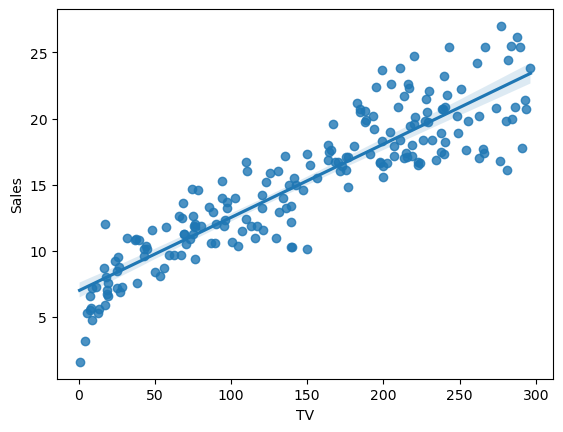

In [12]:
sns.regplot(x="TV" , y="Sales", data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

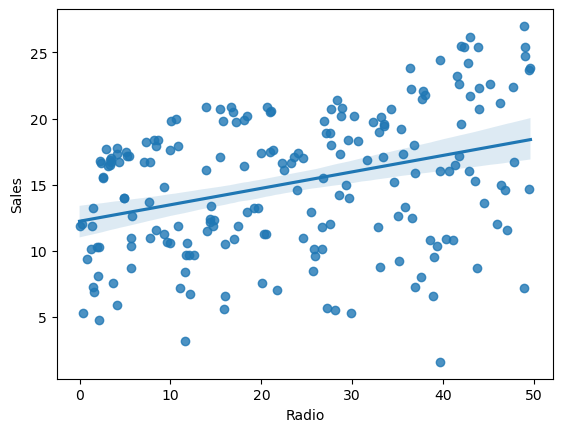

In [13]:
sns.regplot(x="Radio" , y="Sales", data=advertising)

<Axes: xlabel='Newspaper', ylabel='Sales'>

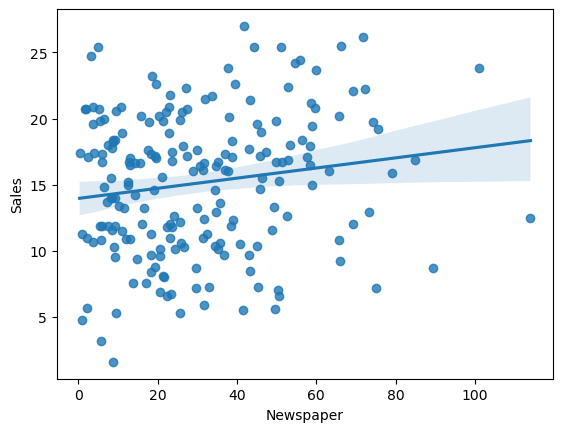

In [14]:
sns.regplot(x="Newspaper" , y="Sales", data=advertising)

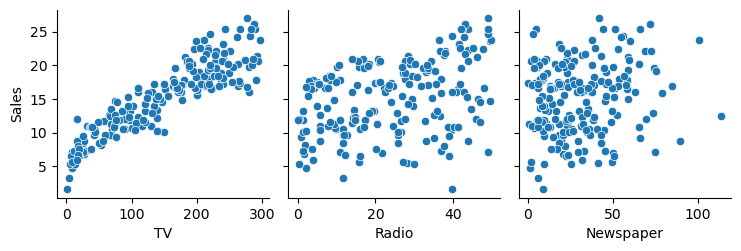

In [16]:
sns.pairplot(data=advertising, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales")

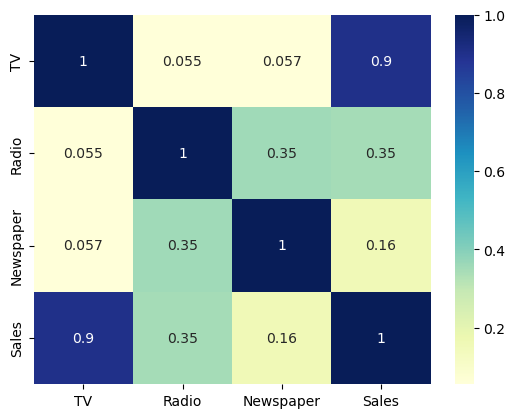

In [17]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
X = advertising["TV"]
y = advertising["Sales"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
import statsmodels.api as sm

In [24]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [26]:
X_train.shape
y_train.shape

(140,)

In [27]:
X_test.shape
y_test.shape

(60,)

In [28]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [29]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [30]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [31]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [33]:
# Sales = 6.04 + 0.05 * TV

In [34]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.52e-52
Time:                        15:54:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

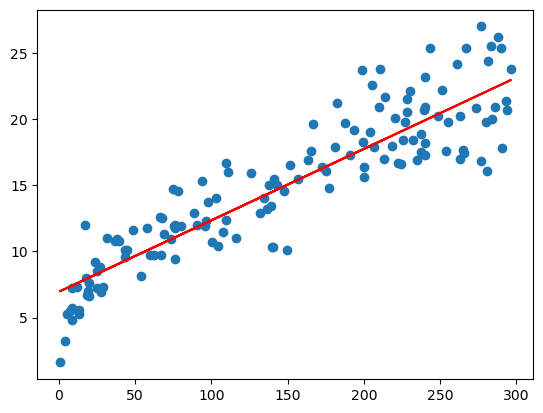

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [43]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [40]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'residualplot')

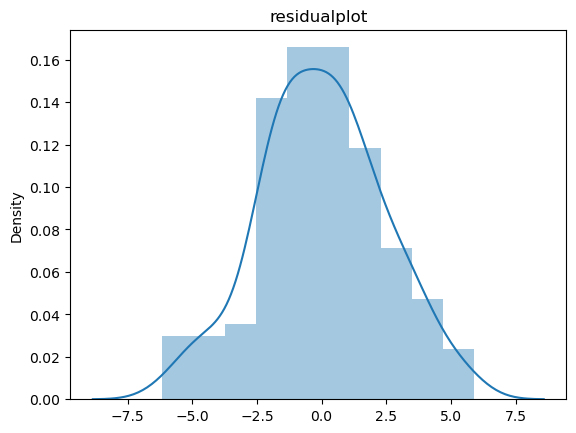

In [41]:
plt.figure()
sns.distplot(res)
plt.title("residualplot")

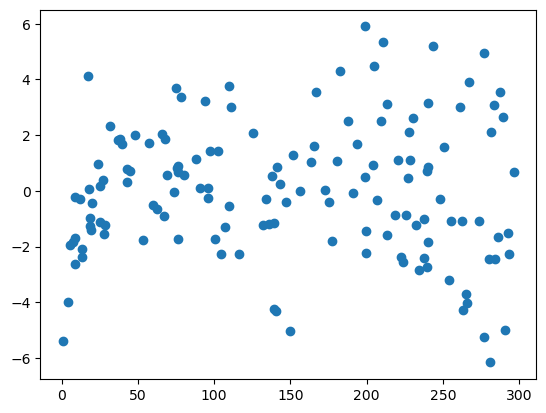

In [42]:
plt.scatter(X_train, res)

In [44]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr.predict(X_test_sm)

In [45]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
r2 = r2_score(y_true = y_test , y_pred = y_test_pred)
r2

0.7921031601245662

In [48]:
r2 = r2_score(y_true = y_train , y_pred = y_train_pred)
r2

0.8157933136480389

In [49]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred)

4.077556371826948

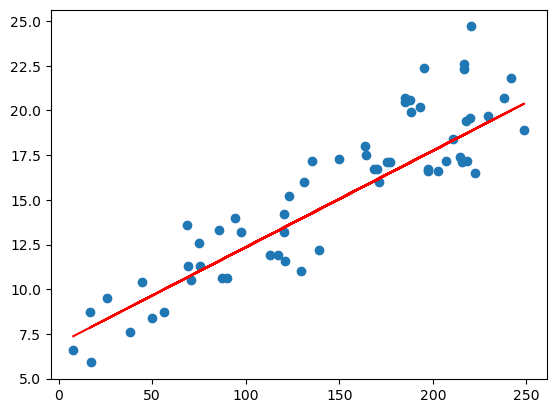

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054*X_test, 'r')
plt.show()

####  SKLEARN

In [51]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [52]:
from sklearn.linear_model import LinearRegression

In [54]:
X_train.shape

(140,)

In [56]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [58]:
X_train_lm.shape

(140, 1)

In [59]:
lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [60]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


In [61]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [62]:
print(r2_score(y_true = y_train , y_pred = y_train_pred))
print(r2_score(y_true = y_test , y_pred = y_test_pred))     

0.8157933136480389
0.7921031601245662
